<a href="https://colab.research.google.com/github/KamauWaData/KamauWaData/blob/main/GlobalYoutubeStatisticsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
import random
from scipy.stats import ttest_1samp
from statsmodels.stats.proportion import proportions_ztest
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

In [ ]:
df = pd.read_csv('/content/sample_data/GlobalYouTubeStatistics.csv',  encoding='latin1')
df.head(5)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [ ]:
#removing rows which are having 0 views though having subscribers and uploads
index = df[(df['video views']==0) & (df['uploads']!=0)].index
df = df.drop(index=index,axis = 0)

index1 = df[(df['video views']==0 & (df['subscribers']!=0))].index
df = df.drop(index=index1,axis = 0)

for i in df.select_dtypes(include = ['int64','float64']).columns:
  df[i] = df[i].fillna(0)

In [ ]:
#Drop the rows where at least one element is missing.
df = df.dropna()

#Replace infinite values with NaNs
df = df.replace([np.inf, -np.inf], np.nan)

#Drop the rows with NaN values
df = df.dropna()


In [ ]:
Cleaned_df = df.to_csv('cleaned_Youtube_stats.csv')

Question 1

In [ ]:
import pandas as pd
from scipy.stats import ttest_1samp, norm
import numpy as np

def calculate_statistics(df, variable, c, p):
    # Select 100 random samples
    sample = df[variable].sample(100)

    #Calculate the sample mean and standard deviation
    mean_sample, std_sample = sample.mean(), sample.std()

    #Perform a one-sample t-test
    t_stat, p_val = ttest_1samp(sample, c)

    #Confidence interval
    ci_sample = norm.interval(0.95, loc=mean_sample, scale=std_sample/np.sqrt(len(sample)))

    #Proportion of values above the median
    prop = (sample > sample.median()).mean()

    #Perform a one-sample t-test for the proportion
    t_stat_prop, p_val_prop = ttest_1samp((sample > sample.median()).astype(int), p)

    # Print the results
    print(f'{variable} Mean: {mean_sample}, Standard Deviation: {std_sample}')
    print(f'T-statistic for {variable}: {t_stat}, P-value for {variable}: {p_val}')
    print(f'95% Confidence Interval for {variable}: {ci_sample}')
    print(f'Proportion above median for {variable}: {prop}, T-statistic for {variable}: {t_stat_prop}, P-value for {variable}: {p_val_prop}')

#Guess for mean and proportion
c = 1000000
p = 0.5
print(f'Claim for the mean (c): {c}')
print(f'Claim for the proportion: {p}')

#load variables
variables = ['subscribers', 'video views', 'Unemployment rate', 'Urban_population']

for variable in variables:
    calculate_statistics(df, variable, c, p)



Claim for the mean (c): 1000000
Claim for the proportion: 0.5
subscribers Mean: 23337000.0, Standard Deviation: 21824662.423482977
T-statistic for subscribers: 10.2347516614808, P-value for subscribers: 3.366027398100989e-17
95% Confidence Interval for subscribers: (19059444.76752287, 27614555.23247713)
Proportion above median for subscribers: 0.5, T-statistic for subscribers: 0.0, P-value for subscribers: 1.0
video views Mean: 12840652252.98, Standard Deviation: 19772721932.08853
T-statistic for video views: 6.493618985326915, P-value for video views: 3.3725991801922936e-09
95% Confidence Interval for video views: (8965269966.658123, 16716034539.301876)
Proportion above median for video views: 0.5, T-statistic for video views: 0.0, P-value for video views: 1.0
Unemployment rate Mean: 9.277500000000002, Standard Deviation: 4.867955490405151
T-statistic for Unemployment rate: -2054231.4416617078, P-value for Unemployment rate: 0.0
95% Confidence Interval for Unemployment rate: (8.323398

question 2

In [ ]:
from scipy.stats import t, norm

#Select 100 random samples from each variable
subscribers_sample = df['subscribers'].sample(100)
video_views_sample = df['video views'].sample(100)
unemployment_rate_sample = df['Unemployment rate'].sample(100)
urban_population_sample = df['Urban_population'].sample(100)

#Calculate sample means and standard deviations
mean_subscribers, std_subscribers = subscribers_sample.mean(), subscribers_sample.std()
mean_video_views, std_video_views = video_views_sample.mean(), video_views_sample.std()
mean_unemployment_rate, std_unemployment_rate = unemployment_rate_sample.mean(), unemployment_rate_sample.std()
mean_urban_population, std_urban_population = urban_population_sample.mean(), urban_population_sample.std()

#Perform two-sample t-tests
t_statistic_subscribers_vs_video_views, p_value_subscribers_vs_video_views = ttest_ind(subscribers_sample, video_views_sample)
t_statistic_subscribers_vs_unemployment_rate, p_value_subscribers_vs_unemployment_rate = ttest_ind(subscribers_sample, unemployment_rate_sample)
t_statistic_video_views_vs_unemployment_rate, p_value_video_views_vs_unemployment_rate = ttest_ind(video_views_sample, unemployment_rate_sample)
t_statistic_video_views_vs_urban_population, p_value_video_views_vs_urban_population = ttest_ind(video_views_sample, urban_population_sample)
t_statistic_unemployment_rate_vs_urban_population, p_value_unemployment_rate_vs_urban_population = ttest_ind(unemployment_rate_sample, urban_population_sample)
t_statistic_unemployment_rate_vs_subscribers, p_value_unemployment_rate_vs_subscribers = ttest_ind(unemployment_rate_sample, subscribers_sample)
t_statistic_urban_population_vs_subscribers, p_value_urban_population_vs_subscribers = ttest_ind(urban_population_sample, subscribers_sample)
t_statistic_urban_population_vs_video_views, p_value_urban_population_vs_video_views = ttest_ind(urban_population_sample, video_views_sample)

#Calculate confidence intervals
ci_subscribers = norm.interval(0.95, loc=mean_subscribers, scale=std_subscribers/np.sqrt(len(subscribers_sample)))
ci_video_views = norm.interval(0.95, loc=mean_video_views, scale=std_video_views/np.sqrt(len(video_views_sample)))
ci_unemployment_rate = norm.interval(0.95, loc=mean_unemployment_rate, scale=std_unemployment_rate/np.sqrt(len(unemployment_rate_sample)))
ci_urban_population = norm.interval(0.95, loc=mean_urban_population, scale=std_urban_population/np.sqrt(len(urban_population_sample)))

#Print the results
print(f'Mean Subscribers: {mean_subscribers}, Standard Deviation Subscribers: {std_subscribers}')
print(f'Mean Video Views: {mean_video_views}, Standard Deviation Video Views: {std_video_views}')
print(f'Mean Unemployment Rate: {mean_unemployment_rate}, Standard Deviation Unemployment Rate: {std_unemployment_rate}')
print(f'Mean Urban Population: {mean_urban_population}, Standard Deviation Urban Population: {std_urban_population}')

print(f'T-statistic for Subscribers vs Video Views: {t_statistic_subscribers_vs_video_views}, P-value: {p_value_subscribers_vs_video_views}')
print(f'T-statistic for Subscribers vs Unemployment Rate: {t_statistic_subscribers_vs_unemployment_rate}, P-value: {p_value_subscribers_vs_unemployment_rate}')
print(f'T-statistic for Video Views vs Unemployment Rate: {t_statistic_video_views_vs_unemployment_rate}, P-value: {p_value_video_views_vs_unemployment_rate}')
print(f'T-statistic for Video Views vs Urban Population: {t_statistic_video_views_vs_urban_population}, P-value: {p_value_video_views_vs_urban_population}')
print(f'T-statistic for Unemployment Rate vs Urban Population: {t_statistic_unemployment_rate_vs_urban_population}, P-value: {p_value_unemployment_rate_vs_urban_population}')
print(f'T-statistic for Unemployment Rate vs Subscribers: {t_statistic_unemployment_rate_vs_subscribers}, P-value: {p_value_unemployment_rate_vs_subscribers}')
print(f'T-statistic for Urban Population vs Subscribers: {t_statistic_urban_population_vs_subscribers}, P-value: {p_value_urban_population_vs_subscribers}')
print(f'T-statistic for Urban Population vs Video Views: {t_statistic_urban_population_vs_video_views}, P-value: {p_value_urban_population_vs_video_views}')

print(f'95% confidence interval for Subscribers: {ci_subscribers}')
print(f'95% confidence interval for Video Views: {ci_video_views}')
print(f'95% confidence interval for Unemployment Rate: {ci_unemployment_rate}')
print(f'95% confidence interval for Urban Population: {ci_urban_population}')




Mean Subscribers: 25829000.0, Standard Deviation Subscribers: 20539315.80991426
Mean Video Views: 11928172437.38, Standard Deviation Video Views: 11118423989.761366
Mean Unemployment Rate: 8.971800000000002, Standard Deviation Unemployment Rate: 4.7504673624408955
Mean Urban Population: 244154851.76, Standard Deviation Urban Population: 162534141.68767336
T-statistic for Subscribers vs Video Views: -10.705045192933266, P-value: 2.155312943759313e-21
T-statistic for Subscribers vs Unemployment Rate: 12.57539017717997, P-value: 4.853070352957818e-27
T-statistic for Video Views vs Unemployment Rate: 10.728294261302237, P-value: 1.8384280052479693e-21
T-statistic for Video Views vs Urban Population: 10.507576761125419, P-value: 8.290137027499009e-21
T-statistic for Unemployment Rate vs Urban Population: -15.021757290684768, P-value: 1.5267730825609168e-34
T-statistic for Unemployment Rate vs Subscribers: -12.57539017717997, P-value: 4.853070352957818e-27
T-statistic for Urban Population vs

question 3

In [ ]:
from scipy.stats import pearsonr, t, norm
import numpy as np

def correlation_analysis(var1, var2, significance_level=0.05):
    #correlation
    correlation, p_val = pearsonr(var1, var2)

    #Hypothesis testing
    t_val = correlation * np.sqrt(len(var1) - 2) / np.sqrt(1 - correlation**2)
    crit_val = t.ppf(1 - significance_level/2, df=len(var1) - 2)

    #confidence intervals
    z_val = norm.ppf(1 - significance_level/2)
    lower_ci = np.tanh(np.arctanh(correlation) - z_val / np.sqrt(len(var1) - 3))
    upper_ci = np.tanh(np.arctanh(correlation) + z_val / np.sqrt(len(var1) - 3))

    # Print the results
    print(f'Correlation: {correlation}')
    print(f'P-value: {p_val}')
    print(f'T-statistic: {t_val}')
    print(f'Critical value: {crit_val}')
    print(f'95% confidence interval: ({lower_ci}, {upper_ci})')

    return correlation, p_val, t_val, crit_val, (lower_ci, upper_ci)

# Get the variables
var1 = df['subscribers']
var2 = df['video views']
var3 = df['Unemployment rate']
var4 = df['Urban_population']

# Perform the analyses
corr_var1_var2, p_val_var1_var2, t_val_var1_var2, crit_val_var1_var2, ci_var1_var2 = correlation_analysis(var1, var2)
corr_var1_var3, p_val_var1_var3, t_val_var1_var3, crit_val_var1_var3, ci_var1_var3 = correlation_analysis(var1, var3)
corr_var2_var3, p_val_var2_var3, t_val_var2_var3, crit_val_var2_var3, ci_var2_var3 = correlation_analysis(var2, var3)
corr_var2_var4, p_val_var2_var4, t_val_var2_var4, crit_val_var2_var4, ci_var2_var4 = correlation_analysis(var2, var4)
corr_var3_var4, p_val_var3_var4, t_val_var3_var4, crit_val_var3_var4, ci_var3_var4 = correlation_analysis(var3, var4)
corr_var3_var1, p_val_var3_var1, t_val_var3_var1, crit_val_var3_var1, ci_var3_var1 = correlation_analysis(var3, var1)
corr_var4_var1, p_val_var4_var1, t_val_var4_var1, crit_val_var4_var1, ci_var4_var1 = correlation_analysis(var4, var1)
corr_var4_var2, p_val_var4_var2, t_val_var4_var2, crit_val_var4_var2, ci_var4_var2 = correlation_analysis(var4, var2)



question 4

Subscribers vs vt


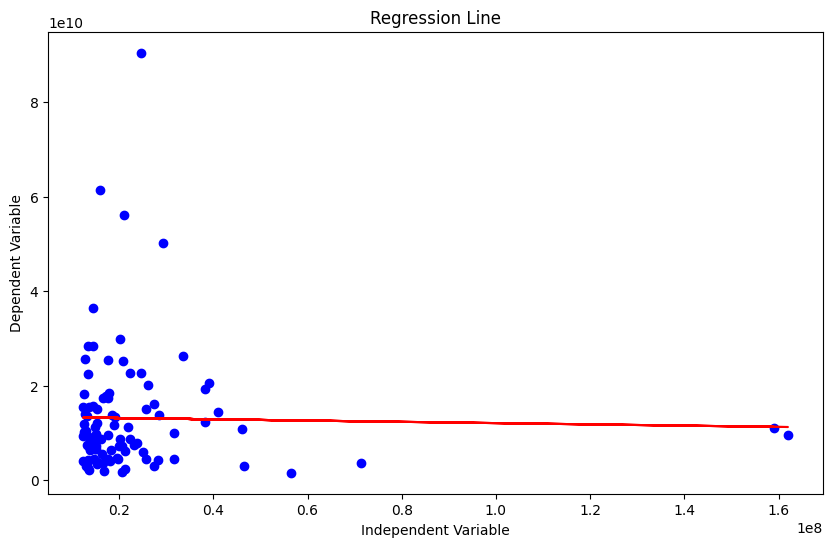

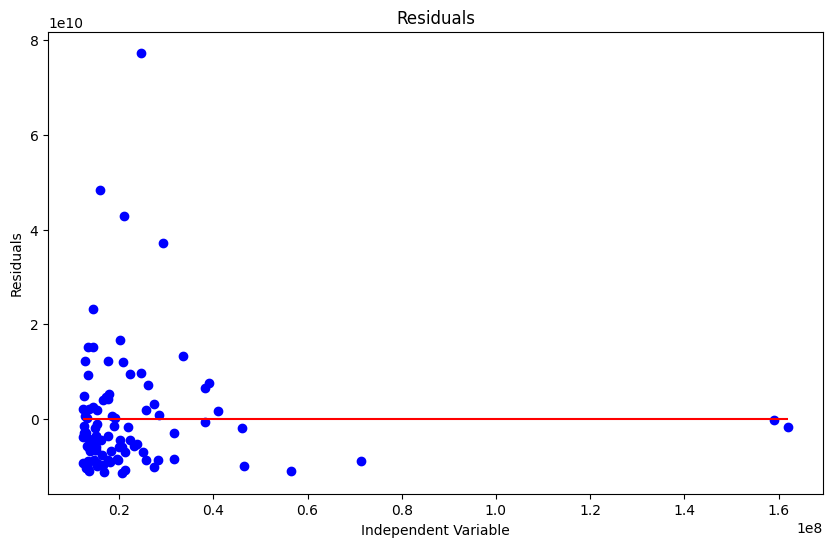

Coefficients: [[-13.37143737]]
Intercept: [1.34493991e+10]
Mean squared error: 1.7310428333822034e+20
R2 score: 0.0004966074264843856
Population vs vt


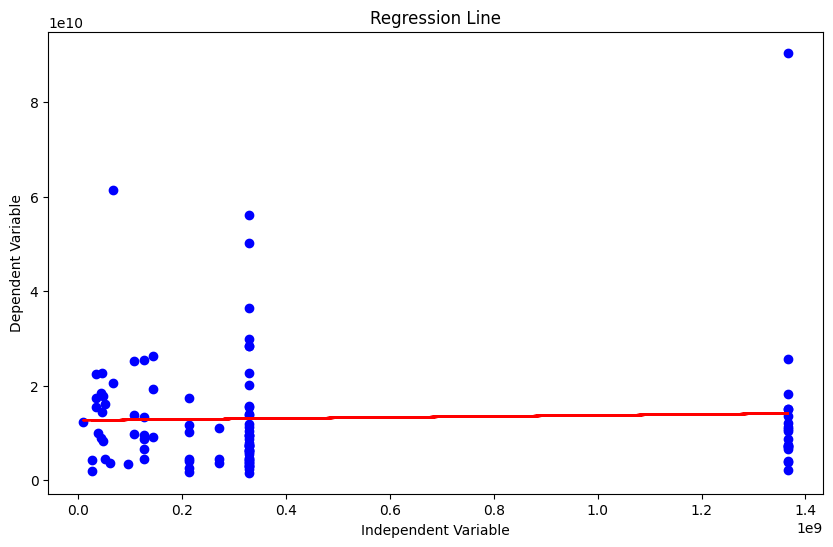

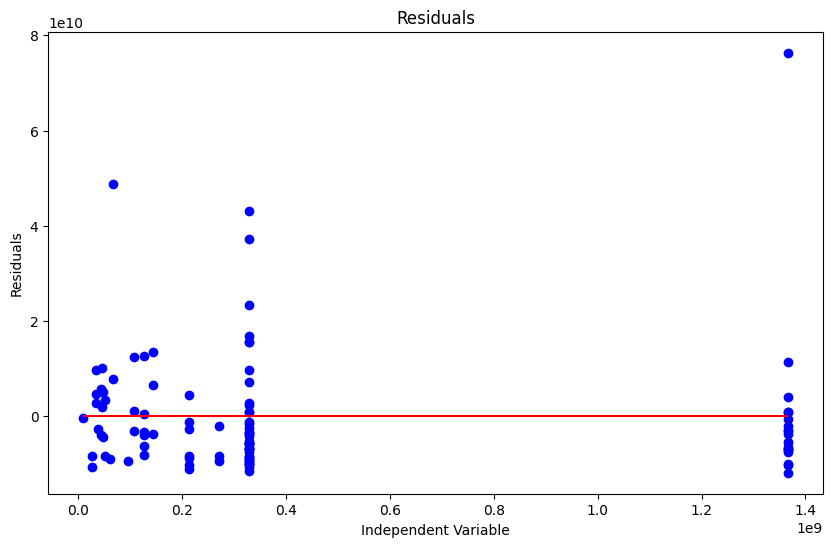

Coefficients: [[1.06226771]]
Intercept: [1.26746942e+10]
Mean squared error: 1.7294881834404076e+20
R2 score: 0.0013942616388028517
Unemployment Rate vs vt


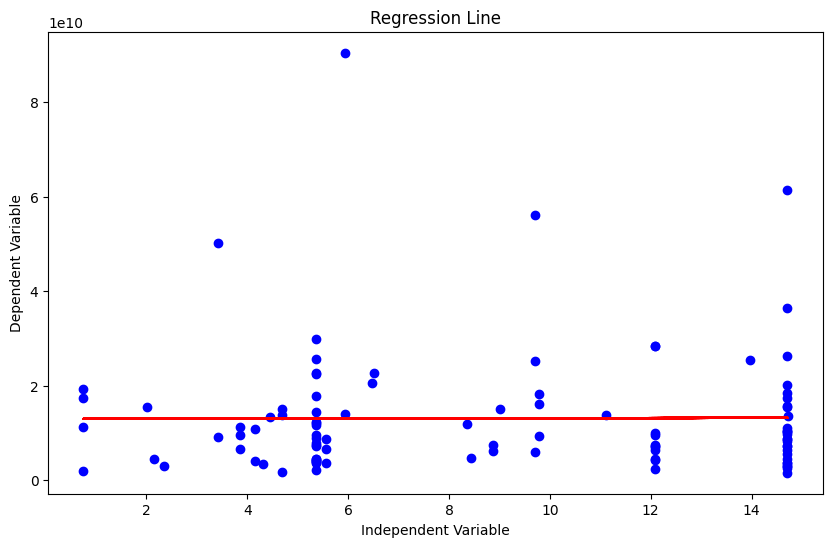

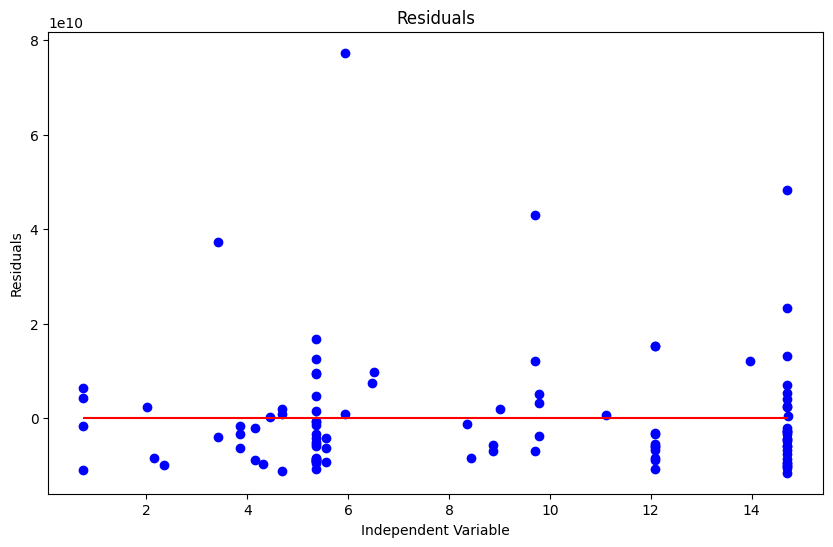

Coefficients: [[13871726.78259308]]
Intercept: [1.3016184e+10]
Mean squared error: 1.7318624155633608e+20
R2 score: 2.3381025171742564e-05
Urban Population vs vt


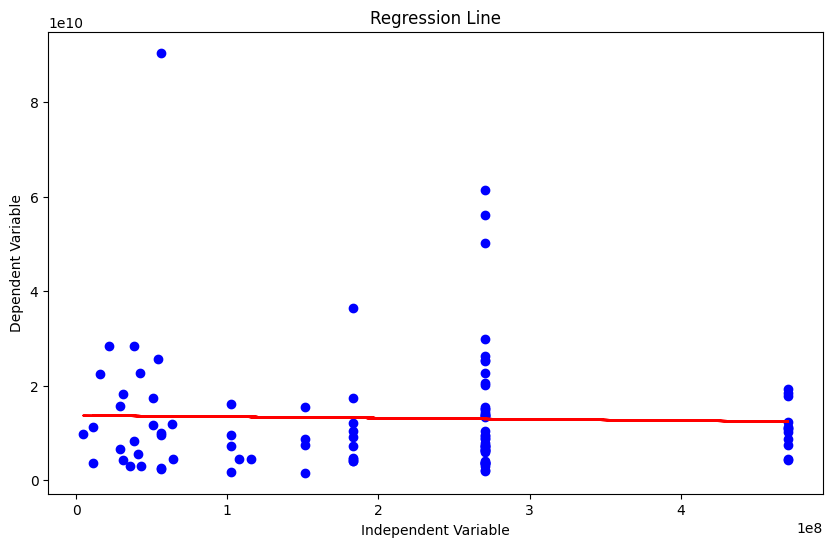

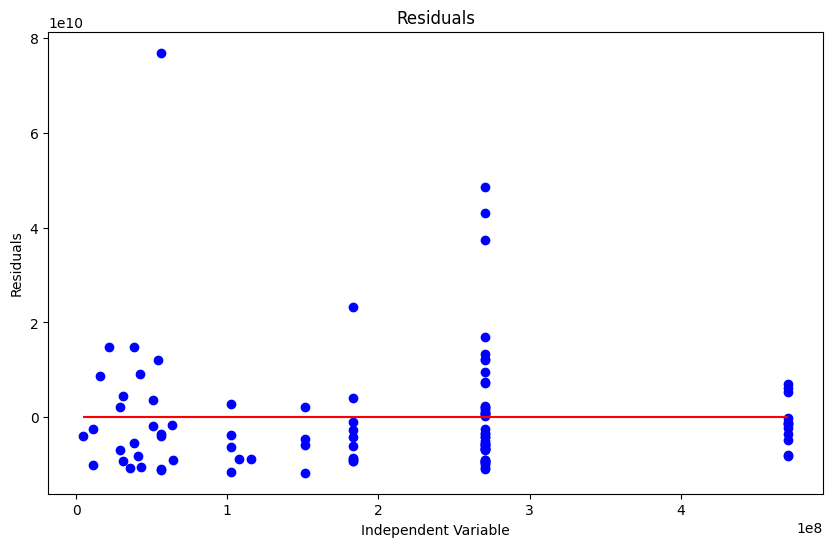

Coefficients: [[-2.72769868]]
Intercept: [1.3721942e+10]
Mean squared error: 1.7305664784181366e+20
R2 score: 0.0007716545792598728


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define a function to perform linear regression, plot the regression line and residuals, and evaluate the goodness of fit
def linear_regression_analysis(x, y):
    #Reshape the data
    x = x.values.reshape(-1, 1)
    y = y.values.reshape(-1, 1)

    #Perform linear regression
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)

    #Plot the regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue')
    plt.plot(x, y_pred, color='red')
    plt.title('Regression Line')
    plt.xlabel('Independent Variable')
    plt.ylabel('Dependent Variable')
    plt.show()

    #Plot the residuals
    residuals = y - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(x, residuals, color='blue')
    plt.hlines(0, x.min(), x.max(), colors='red')
    plt.title('Residuals')
    plt.xlabel('Independent Variable')
    plt.ylabel('Residuals')
    plt.show()

    #Evaluate the fit
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f'Coefficients: {model.coef_}')
    print(f'Intercept: {model.intercept_}')
    print(f'Mean squared error: {mse}')
    print(f'R2 score: {r2}')

#load variables
v1 = df['subscribers'].sample(100)
v5 = df['Population'].sample(100)
v3 = df['Unemployment rate'].sample(100)
v4 = df['Urban_population'].sample(100)
vt = df['video views'].sample(100)

#Perform the analyses
print('Subscribers vs vt')
linear_regression_analysis(v1, vt)
print('Population vs vt')
linear_regression_analysis(v5, vt)
print('Unemployment Rate vs vt')
linear_regression_analysis(v3, vt)
print('Urban Population vs vt')
linear_regression_analysis(v4, vt)


In [ ]:
for col in df.select_dtypes(include=[np.number]).columns:
    print(col, np.isinf(df[col]).sum())


rank 0
subscribers 0
video views 0
uploads 0
video_views_rank 0
country_rank 0
channel_type_rank 0
video_views_for_the_last_30_days 0
lowest_monthly_earnings 0
highest_monthly_earnings 0
lowest_yearly_earnings 0
highest_yearly_earnings 0
subscribers_for_last_30_days 0
created_year 0
created_date 0
Gross tertiary education enrollment (%) 0
Population 0
Unemployment rate 0
Urban_population 0
Latitude 0
Longitude 0


Qustion 5

In [ ]:
#Randomly select 100 samples from each column
df_sample = df.sample(100)

#function to fit the model and print the results
def fit_and_print_model(dependent_var, independent_vars, model_num):
    X = df_sample[independent_vars]
    X = sm.add_constant(X)
    model = sm.OLS(df_sample[dependent_var], X).fit()
    print(f"Model {model_num} R-squared: {model.rsquared}")
    print(f"Model {model_num} Adjusted R-squared: {model.rsquared_adj}")
    print(f"Model {model_num} Regression Equation: {dependent_var} = {model.params[0]} + {model.params[1]} * {independent_vars[0]} + {model.params[2]} * {independent_vars[1]} + {model.params[3]} * {independent_vars[2]}")

#Fit and print the models
fit_and_print_model('highest_yearly_earnings', ['subscribers', 'video views', 'Unemployment rate'], 1)
fit_and_print_model('highest_yearly_earnings', ['subscribers', 'video views', 'Unemployment rate'], 2)
fit_and_print_model('highest_yearly_earnings', ['video views', 'Urban_population', 'subscribers'], 3)
fit_and_print_model('highest_yearly_earnings', ['Urban_population', 'subscribers', 'video views'], 4)
fit_and_print_model('highest_yearly_earnings', ['subscribers', 'Urban_population', 'video views'], 5)


Model 1 R-squared: 0.43016304521709614
Model 1 Adjusted R-squared: 0.4123556403801304
Model 1 Regression Equation: highest_yearly_earnings = 1043676.7749054767 + 0.03010182227721661 * subscribers + 0.0005222582611512136 * video views + -143012.02274394128 * Unemployment rate
Model 2 R-squared: 0.43016304521709614
Model 2 Adjusted R-squared: 0.4123556403801304
Model 2 Regression Equation: highest_yearly_earnings = 1043676.7749054767 + 0.03010182227721661 * subscribers + 0.0005222582611512136 * video views + -143012.02274394128 * Unemployment rate
Model 3 R-squared: 0.43942028415086454
Model 3 Adjusted R-squared: 0.421902168030579
Model 3 Regression Equation: highest_yearly_earnings = -2008927.6653107265 + 0.0005272571310343136 * video views + 0.007601978866588853 * Urban_population + 0.032720093015274065 * subscribers
Model 4 R-squared: 0.43942028415086454
Model 4 Adjusted R-squared: 0.421902168030579
Model 4 Regression Equation: highest_yearly_earnings = -2008927.6653107037 + 0.0076019